<a href="https://colab.research.google.com/github/Eric428-a/-LMS-Learning-Management-System/blob/master/1_2_15_Patient_No_show_Prediction_using_Gradient_Boosting_Machines_(GBM)_Starter_Kit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLANATORY DATA ANALYSIS(EDA)

# Step 1: Import Libraries and Load Data

In [5]:
# import the working libraries

In [6]:
import pandas as pd  # Pandas library for data manipulation and analysis

In [7]:
import numpy as np   # NumPy library for numerical computing

In [8]:
import matplotlib.pyplot as plt   # Matplotlib library for data visualization

In [9]:
import seaborn as sns   # Seaborn library for statistical data visualization

In [10]:
from sklearn.model_selection import train_test_split   # Splitting the dataset into training and testing sets

In [11]:
from sklearn.ensemble import GradientBoostingClassifier   # Gradient Boosting Classifier algorithm

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score   # Model evaluation metrics

In [13]:
from sklearn.preprocessing import StandardScaler   # Standardize features by removing the mean and scaling to unit variance


In [14]:
# Load Data

In [15]:
file_path = "KaggleV2-May-2016.csv"

In [16]:
df = pd.read_csv(file_path)   # Load the dataset from the provided file path

# Step 2: Preliminary Data Inspection

In [18]:
# Display the first few rows of the dataframe

In [19]:
print(df.head())

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [20]:
# Check the shape of the dataframe

In [21]:
print(df.shape)

(110527, 14)


In [22]:
# Check for missing values

In [23]:
print(df.isnull().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [24]:
# Summary statistics for numerical features

In [25]:
print(df.describe())

          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

# Step 3: Data Visualization

In [26]:
# Histograms for numerical features

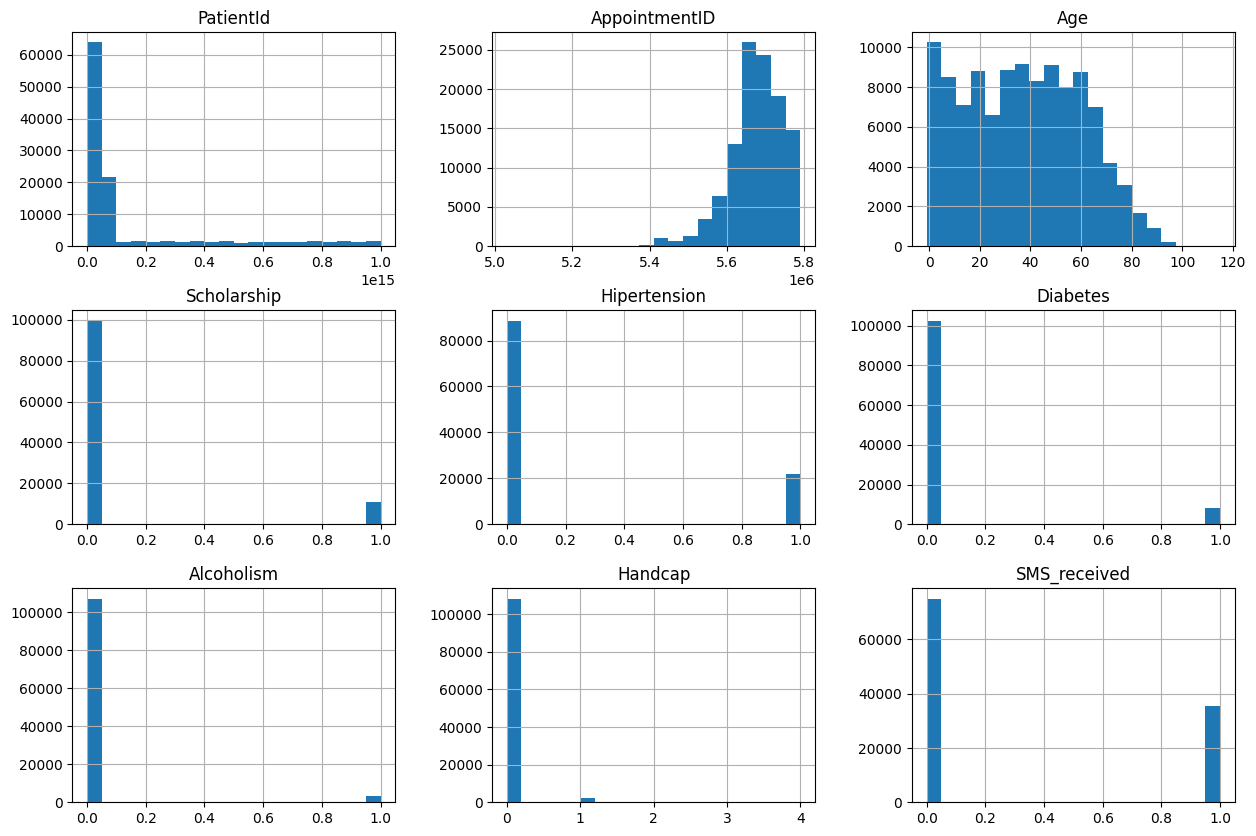

In [27]:
df.hist(bins=20, figsize=(15, 10))
plt.show()

In [28]:
# Box plots for numerical features

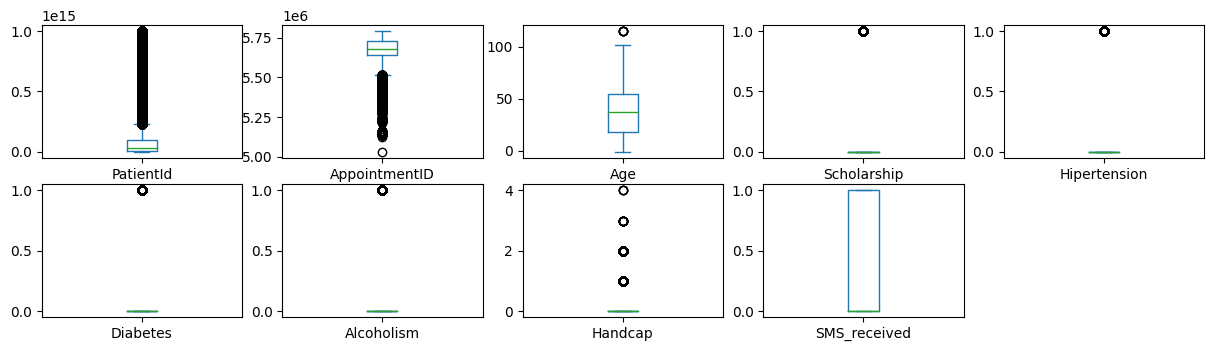

In [29]:
df.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(15,10))
plt.show()

In [30]:
# Correlation matrix heatmap

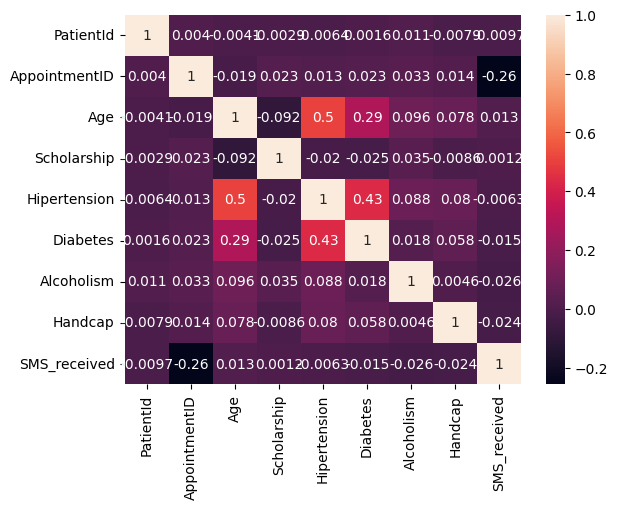

In [32]:
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# DATA PROCESSING

# Step 4: Data Cleaning

In [33]:
# - Converting 'ScheduledDay' and 'AppointmentDay' columns to datetime format is necessary for further analysis.
# - This conversion allows for easier manipulation and extraction of date-related information.

In [34]:
# Convert 'ScheduledDay' column to datetime

In [35]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [36]:
# Convert 'AppointmentDay' column to datetime

In [37]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Step 5: Feature Engineering

In [38]:
#  Creating a new feature 'WaitingDays' helps capture the time gap between scheduling and appointment.
#  This feature could potentially influence the prediction of no-show appointments.

In [39]:
# Calculate waiting days between scheduling and appointment

In [40]:
df['WaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Step 6: Feature Encoding

In [41]:
#  Encoding the 'No-show' column to binary labels is essential for classification tasks.
#  Converting 'No-show' to numerical format facilitates model training and evaluation.

In [44]:
# Feature scaling is performed to standardize the range of numeric features.
# Standardizing the features ensures that they have a mean of 0 and a standard deviation of 1, which can improve model convergence and performance.


In [42]:
# Encode 'No-show' column to binary labels: 0 for 'No', 1 for 'Yes'

In [43]:
df['No-show'] = df['No-show'].map({'Yes': 1, 'No': 0})

In [45]:
# Initialize StandardScaler

In [46]:
scaler = StandardScaler()

In [47]:
# Select numeric features for scaling

In [48]:
numeric_features = df.select_dtypes(include=[np.number]).drop('No-show', axis=1)

In [49]:
# Standardize numerical features for better model performance

In [50]:
scaled_features = scaler.fit_transform(numeric_features)

# Step 7: Splitting the Dataset

In [51]:
# Splitting the dataset into training and testing sets is crucial for model evaluation.
# The 'train_test_split' function divides the data into two subsets, one for training the model and the other for testing its performance.
# The 'test_size' parameter specifies the proportion of the dataset to include in the testing set.
# Setting a 'random_state' ensures reproducibility of the split.

In [52]:
# Split the dataset into training and testing sets

In [53]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['No-show'], test_size=0.2, random_state=42)

# MODEL BUILDING

# Step 8: Building the GBM Model

In [54]:
# Building the Gradient Boosting Classifier (GBM) model involves initializing the model with hyperparameters such as the number of estimators, learning rate, and maximum depth of trees.
# The 'fit' method trains the GBM model using the training data (X_train and y_train), learning from the relationships between features and target variable.
# The model is then ready to make predictions on unseen data.

In [55]:
# Initialize Gradient Boosting Classifier with specified hyperparameters

In [56]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [57]:
# Fit Gradient Boosting Classifier model with training data

In [58]:
gbm.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

# MODEL EVALUTION

# Step 9: Evaluate the Model

In [59]:
# Evaluating the model is essential to assess its performance on unseen data.
# The confusion matrix provides insights into the model's predictions, showing the true positives, true negatives, false positives, and false negatives.
# The classification report summarizes the precision, recall, F1-score, and support for each class, providing a comprehensive evaluation of the model's performance.
# The accuracy score quantifies the overall accuracy of the model's predictions.

In [60]:
# Make predictions on the testing data

In [61]:
y_pred = gbm.predict(X_test)

In [62]:
# Print confusion matrix

In [63]:
print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion matrix:
[[17644    25]
 [ 4416    21]]


In [64]:
# Print classification report

In [65]:
print("\nClassification report:")
print(classification_report(y_test, y_pred))


Classification report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17669
           1       0.46      0.00      0.01      4437

    accuracy                           0.80     22106
   macro avg       0.63      0.50      0.45     22106
weighted avg       0.73      0.80      0.71     22106



In [66]:
# Print accuracy score

In [67]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7991043155704334


# FEATURE IMPORTANCE

# Step 10: Analyzing Feature Importance

In [68]:
# The feature importance plot helps in identifying the most relevant features for predicting no-show appointments.
# Higher relative importance indicates a stronger influence of the feature on the model's predictions.
# Understanding feature importance can guide feature selection and model interpretation.

In [69]:
# Calculate feature importance from the trained GBM model

In [70]:
feature_importance = gbm.feature_importances_

In [71]:
# Sort feature importance indices

In [72]:
sorted_idx = np.argsort(feature_importance)

In [73]:

# Create positions for horizontal bars

In [74]:
pos = np.arange(sorted_idx.shape[0]) + .5

In [75]:
# Plot feature importance

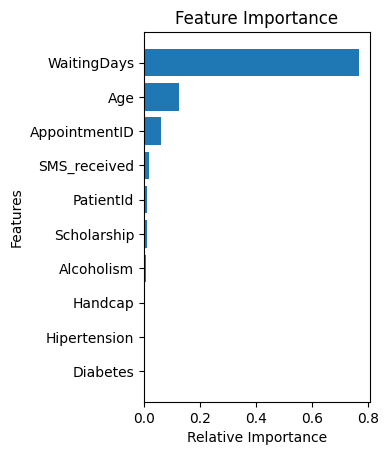

In [76]:
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(numeric_features.columns)[sorted_idx])
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

# VISUALIZATION

#  Step 11: Visualizing Model Performance

In [79]:
# - Visualizing the model performance through a confusion matrix heatmap provides insights into the model's predictive accuracy.
# - The heatmap visually represents the true positive, true negative, false positive, and false negative predictions.
# - Annotated values in the heatmap indicate the count of observations for each prediction category.
# - This visualization aids in understanding the model's strengths and weaknesses in predicting no-show appointments.


In [77]:
# Plotting the confusion matrix

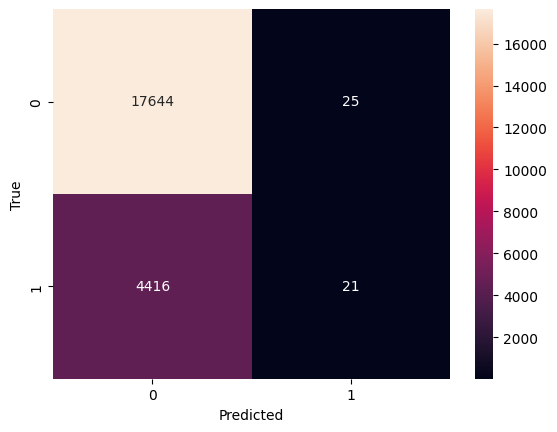

In [78]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()